In [1]:
# Install necessary libraries
!pip install scikit-learn opencv-python-headless numpy imutils


In [2]:
# Import necessary packages
from imutils import paths
import numpy as np
import cv2
import pickle
from sklearn.ensemble import IsolationForest




In [3]:
# Function to compute the 3D color histogram of an image
def quantify_image(image, bins=(4, 6, 3)):
    # Compute a 3D color histogram over the image and normalize it
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Function to load and preprocess the dataset
def load_dataset(datasetPath, bins):
    # Grab all image paths in the dataset directory
    imagePaths = list(paths.list_images(datasetPath))
    data = []
    # Loop through each image path
    for imagePath in imagePaths:
        # Load the image and convert it to HSV color space
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Quantify the image and store its features
        features = quantify_image(image, bins)
        data.append(features)
    return np.array(data)


In [4]:
# Train the anomaly detector
def train_anomaly_detector(dataset_path, model_path, bins=(3, 3, 3)):
    # Load and quantify the dataset
    print("[INFO] Preparing dataset...")
    data = load_dataset(dataset_path, bins)

    # Train the IsolationForest model
    print("[INFO] Fitting anomaly detection model...")
    model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    model.fit(data)

    # Save the trained model
    with open(model_path, "wb") as f:
        f.write(pickle.dumps(model))
    print(f"[INFO] Model saved to {model_path}")


In [11]:
# Test the anomaly detector
def test_anomaly_detector(model_path, image_path, bins=(3, 3, 3)):
    # Load the trained model
    print("[INFO] Loading anomaly detection model...")
    model = pickle.loads(open(model_path, "rb").read())

    # Load and preprocess the input image
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    features = quantify_image(hsv, bins)

    # Predict whether the image is an anomaly
    preds = model.predict([features])[0]
    label = "anomaly" if preds == -1 else "normal"
    color = (0, 0, 255) if preds == -1 else (0, 255, 0)

    # Display the results
    from matplotlib import pyplot as plt
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.show()

In [8]:
# Example: Train the anomaly detector
dataset_path = "forest"  # Replace with your dataset folder path
model_path = "anomaly_detector.model"  # Path to save the trained model
train_anomaly_detector(dataset_path, model_path)


[INFO] Preparing dataset...
[INFO] Fitting anomaly detection model...
[INFO] Model saved to anomaly_detector.model


[INFO] Loading anomaly detection model...


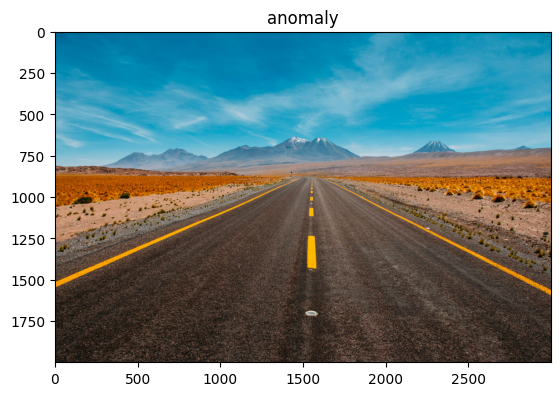

In [12]:
# Example: Test the anomaly detector
model_path = "anomaly_detector.model"  # Path to the trained model
image_path = "examples/photo-1494783367193-149034c05e8f.jpg"  # Path to the test image
test_anomaly_detector(model_path, image_path)


[INFO] Loading anomaly detection model...


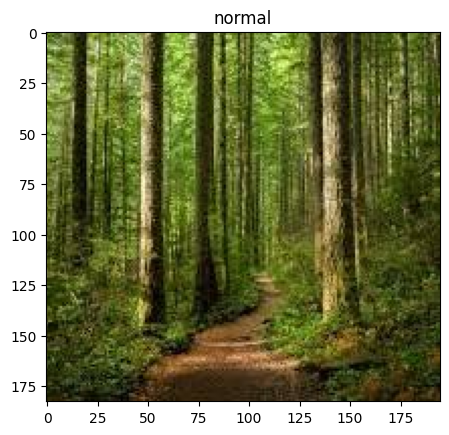

In [13]:
# Example: Test the anomaly detector
model_path = "anomaly_detector.model"  # Path to the trained model
image_path = "/content/examples/download.jpg"  # Path to the test image
test_anomaly_detector(model_path, image_path)
